In [55]:
import pandas as pd
df = pd.read_csv('Dataset.csv')

In [56]:
df.head()

Commodity           State    Market  \
0  Bajra(Pearl Millet/Cumbu)  Andhra Pradesh   Kurnool   
1  Bajra(Pearl Millet/Cumbu)     Chattisgarh    Raipur   
2  Bajra(Pearl Millet/Cumbu)         Gujarat  Amirgadh   
3  Bajra(Pearl Millet/Cumbu)         Gujarat    Amreli   
4  Bajra(Pearl Millet/Cumbu)         Gujarat     Bayad   

              Today Price               Last Week              Last Month  \
0  2379 (Mx:2657 Mn:2259)  2389 (Mx:2625 Mn:2389)                       -   
1  2968 (Mx:3150 Mn:2900)                       -                       -   
2  2685 (Mx:2685 Mn:2680)  2650 (Mx:2650 Mn:2640)  2650 (Mx:2650 Mn:2600)   
3  2705 (Mx:3125 Mn:1830)                       -  2840 (Mx:3000 Mn:2440)   
4  2100 (Mx:2625 Mn:2000)  2300 (Mx:2625 Mn:2000)                       -   

  Last Year Today Arrivals Last Week.1 Last Month.1 Last Year.1  
0         -           10.6         1.4            -           -  
1         -           48.8           -            -           -  
2         -            0.8         1.4          0.4           -  
3         -            1.8           -          4.4           -  
4         -            0.1         0.1            -           -

In [57]:
print(df.columns)
print(df.dtypes)

Index(['Commodity', 'State', 'Market', 'Today Price', 'Last Week',
       'Last Month', 'Last Year', 'Today Arrivals', 'Last Week.1',
       'Last Month.1', 'Last Year.1'],
      dtype='object')
Commodity         object
State             object
Market            object
Today Price       object
Last Week         object
Last Month        object
Last Year         object
Today Arrivals    object
Last Week.1       object
Last Month.1      object
Last Year.1       object
dtype: object


In [58]:
print(df.isnull().sum())

Commodity           0
State               0
Market              0
Today Price         7
Last Week           8
Last Month          5
Last Year           0
Today Arrivals      0
Last Week.1         0
Last Month.1        7
Last Year.1       102
dtype: int64


In [59]:
df.rename(columns={
    'Today Price': 'Price',
    'Market': 'Market',
    'State': 'State',
    'Commodity': 'Commodity'
}, inplace=True)

In [60]:
df.head()

Commodity           State    Market  \
0  Bajra(Pearl Millet/Cumbu)  Andhra Pradesh   Kurnool   
1  Bajra(Pearl Millet/Cumbu)     Chattisgarh    Raipur   
2  Bajra(Pearl Millet/Cumbu)         Gujarat  Amirgadh   
3  Bajra(Pearl Millet/Cumbu)         Gujarat    Amreli   
4  Bajra(Pearl Millet/Cumbu)         Gujarat     Bayad   

                    Price               Last Week              Last Month  \
0  2379 (Mx:2657 Mn:2259)  2389 (Mx:2625 Mn:2389)                       -   
1  2968 (Mx:3150 Mn:2900)                       -                       -   
2  2685 (Mx:2685 Mn:2680)  2650 (Mx:2650 Mn:2640)  2650 (Mx:2650 Mn:2600)   
3  2705 (Mx:3125 Mn:1830)                       -  2840 (Mx:3000 Mn:2440)   
4  2100 (Mx:2625 Mn:2000)  2300 (Mx:2625 Mn:2000)                       -   

  Last Year Today Arrivals Last Week.1 Last Month.1 Last Year.1  
0         -           10.6         1.4            -           -  
1         -           48.8           -            -           -  
2         -            0.8         1.4          0.4           -  
3         -            1.8           -          4.4           -  
4         -            0.1         0.1            -           -

In [61]:
import re

def remove_brackets(val):
    # Remove anything in parentheses/brackets and trailing/leading spaces
    if pd.isnull(val) or str(val).strip() == "-":
        return None
    # Remove bracketed info and keep only the first numeric value
    val = re.sub(r"\s*\(.*?\)", "", str(val)).strip()
    try:
        return float(val)
    except:
        return None

for col in ['Price', 'Last Week', 'Last Month', 'Last Year']:
    if col in df.columns:
        df[col] = df[col].apply(remove_brackets)

In [62]:
df.head()

Commodity           State    Market   Price  Last Week  \
0  Bajra(Pearl Millet/Cumbu)  Andhra Pradesh   Kurnool  2379.0     2389.0   
1  Bajra(Pearl Millet/Cumbu)     Chattisgarh    Raipur  2968.0        NaN   
2  Bajra(Pearl Millet/Cumbu)         Gujarat  Amirgadh  2685.0     2650.0   
3  Bajra(Pearl Millet/Cumbu)         Gujarat    Amreli  2705.0        NaN   
4  Bajra(Pearl Millet/Cumbu)         Gujarat     Bayad  2100.0     2300.0   

   Last Month  Last Year Today Arrivals Last Week.1 Last Month.1 Last Year.1  
0         NaN        NaN           10.6         1.4            -           -  
1         NaN        NaN           48.8           -            -           -  
2      2650.0        NaN            0.8         1.4          0.4           -  
3      2840.0        NaN            1.8           -          4.4           -  
4         NaN        NaN            0.1         0.1            -           -

In [66]:
# Fill nulls in each price column by Commodity + State group average
for col in ['Last Week', 'Last Month', 'Last Year']:
    if col in df.columns:
        group_filled = df.groupby(['Commodity', 'State'])[col].transform(lambda x: x.fillna(x.mean()))
        overall_filled = group_filled.fillna(df[col].mean())
        df[col] = overall_filled

In [71]:
df.head(50)

Commodity           State                  Market   Price  \
0   Bajra(Pearl Millet/Cumbu)  Andhra Pradesh                 Kurnool  2379.0   
1   Bajra(Pearl Millet/Cumbu)     Chattisgarh                  Raipur  2968.0   
2   Bajra(Pearl Millet/Cumbu)         Gujarat                Amirgadh  2685.0   
3   Bajra(Pearl Millet/Cumbu)         Gujarat                  Amreli  2705.0   
4   Bajra(Pearl Millet/Cumbu)         Gujarat                   Bayad  2100.0   
5   Bajra(Pearl Millet/Cumbu)         Gujarat               Bhavnagar  2650.0   
6   Bajra(Pearl Millet/Cumbu)         Gujarat                  Borsad  2625.0   
7   Bajra(Pearl Millet/Cumbu)         Gujarat                   Dahod  2650.0   
8   Bajra(Pearl Millet/Cumbu)         Gujarat                   Deesa  2900.0   
9   Bajra(Pearl Millet/Cumbu)         Gujarat           Deesa(Bhildi)  2850.0   
10  Bajra(Pearl Millet/Cumbu)         Gujarat                  Dehgam  2865.0   
11  Bajra(Pearl Millet/Cumbu)         Gujarat        Dehgam(Rekhiyal)  2750.0   
12  Bajra(Pearl Millet/Cumbu)         Gujarat                 Dhanera  2787.5   
13  Bajra(Pearl Millet/Cumbu)         Gujarat                 Dhoraji  2630.0   
14  Bajra(Pearl Millet/Cumbu)         Gujarat                  Gondal  2555.0   
15  Bajra(Pearl Millet/Cumbu)         Gujarat                   Harij  2370.0   
16  Bajra(Pearl Millet/Cumbu)         Gujarat              Himatnagar  2525.0   
17  Bajra(Pearl Millet/Cumbu)         Gujarat                Jambusar  2300.0   
18  Bajra(Pearl Millet/Cumbu)         Gujarat         Jambusar(Kaavi)  2400.0   
19  Bajra(Pearl Millet/Cumbu)         Gujarat                  Jasdan  2500.0   
20  Bajra(Pearl Millet/Cumbu)         Gujarat                    Kadi  2600.0   
21  Bajra(Pearl Millet/Cumbu)         Gujarat  Khambhat(Grain Market)  2425.0   
22  Bajra(Pearl Millet/Cumbu)         Gujarat                 Kodinar  2855.0   
23  Bajra(Pearl Millet/Cumbu)         Gujarat    Mahuva(Station Road)  2660.0   
24  Bajra(Pearl Millet/Cumbu)         Gujarat                 Mehsana  2650.0   
25  Bajra(Pearl Millet/Cumbu)         Gujarat                   Morbi  3065.0   
26  Bajra(Pearl Millet/Cumbu)         Gujarat        Nizar(Kukarmuda)  2150.0   
27  Bajra(Pearl Millet/Cumbu)         Gujarat                Palanpur  2675.0   
28  Bajra(Pearl Millet/Cumbu)         Gujarat                Palitana  2175.0   
29  Bajra(Pearl Millet/Cumbu)         Gujarat              Panthawada  2850.0   
30  Bajra(Pearl Millet/Cumbu)         Gujarat               Radhanpur  2656.0   
31  Bajra(Pearl Millet/Cumbu)         Gujarat                  Rajkot  2250.0   
32  Bajra(Pearl Millet/Cumbu)         Gujarat                  Rajula  2943.0   
33  Bajra(Pearl Millet/Cumbu)         Gujarat                    Sami  2375.0   
34  Bajra(Pearl Millet/Cumbu)         Gujarat             Savarkundla  2838.0   
35  Bajra(Pearl Millet/Cumbu)         Gujarat                Siddhpur  2732.0   
36  Bajra(Pearl Millet/Cumbu)         Gujarat                  Taleja  2660.0   
37  Bajra(Pearl Millet/Cumbu)         Gujarat                   Talod  3070.0   
38  Bajra(Pearl Millet/Cumbu)         Gujarat                   Thara  2772.5   
39  Bajra(Pearl Millet/Cumbu)         Gujarat          Thara(Shihori)  2587.5   
40  Bajra(Pearl Millet/Cumbu)         Gujarat                  Tharad  2815.0   
41  Bajra(Pearl Millet/Cumbu)         Gujarat             Tharad(Rah)  3000.0   
42  Bajra(Pearl Millet/Cumbu)         Gujarat                  Umreth  2770.0   
43  Bajra(Pearl Millet/Cumbu)         Gujarat                  Vadgam  2705.0   
44  Bajra(Pearl Millet/Cumbu)         Gujarat               Visavadar  1965.0   
45  Bajra(Pearl Millet/Cumbu)         Gujarat                Visnagar  2655.0   
46  Bajra(Pearl Millet/Cumbu)       Karnataka               Bagalakot  2303.0   
47  Bajra(Pearl Millet/Cumbu)       Karnataka               Bangalore  3200.0   
48  Bajra(Pearl Millet/Cumbu)       Karnataka      

In [72]:
sunflow_rows = df[df['Commodity'].str.contains('sunflow', case=False, na=False)]
print(sunflow_rows)

      Commodity        State       Market   Price    Last Week   Last Month  \
1727  Sunflower  Maharashtra      Amalner  4925.0  3482.049876  4001.000000   
1728  Sunflower      Haryana       Babain     NaN  7280.000000  3289.357187   
1729  Sunflower  Maharashtra     Baramati  5000.0  3482.049876  4076.000000   
1730  Sunflower    Karnataka  Chitradurga     NaN  3482.049876  4639.000000   
1731  Sunflower  Maharashtra       Jalana  4850.0  3482.049876  4076.000000   
1732  Sunflower    Karnataka     Kalburgi     NaN  3482.049876  4200.000000   
1733  Sunflower    Karnataka      Kustagi     NaN  3482.049876  4700.000000   
1734  Sunflower      Haryana        Ladwa     NaN  7280.000000  3289.357187   
1735  Sunflower  Maharashtra      Pachora  4925.0  3482.049876  4151.000000   
1736  Sunflower  Chattisgarh      Raigarh  4000.0  3482.049876  3289.357187   

       Last Year Today Arrivals  Last Week.1 Last Month.1 Last Year.1  
1727  2995.92835    Maharashtra      Amalner          NaN 

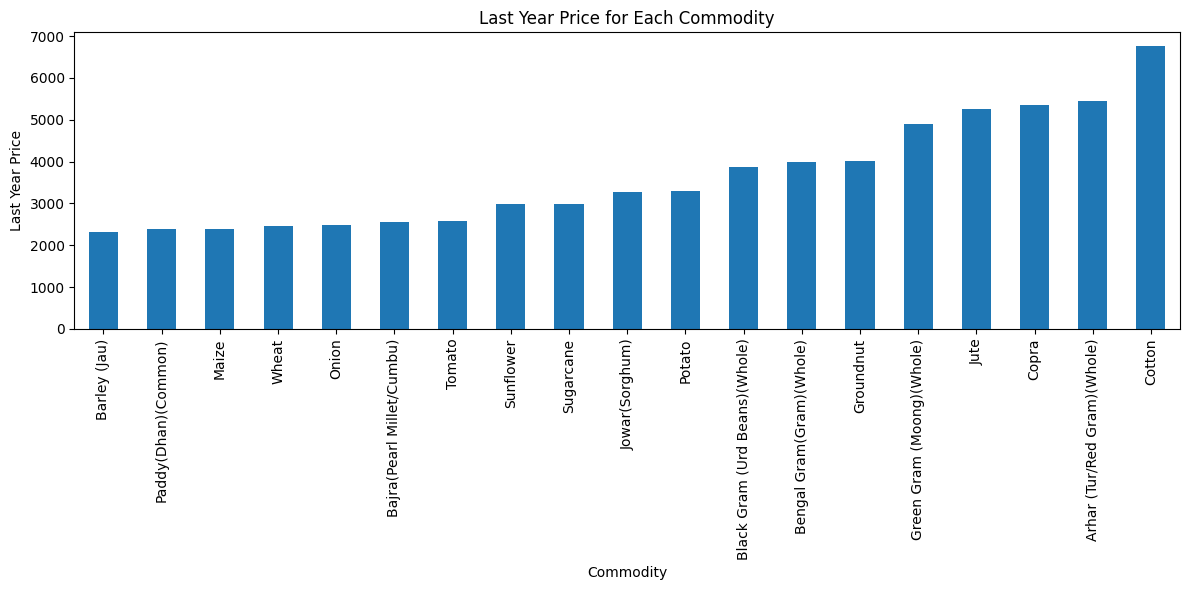

In [73]:
import matplotlib.pyplot as plt

# Group by Commodity and get the mean Last Year price (if there are duplicates)
commodity_last_year = df.groupby('Commodity')['Last Year'].mean().sort_values()

plt.figure(figsize=(12,6))
commodity_last_year.plot(kind='bar')
plt.ylabel('Last Year Price')
plt.title('Last Year Price for Each Commodity')
plt.tight_layout()
plt.show()

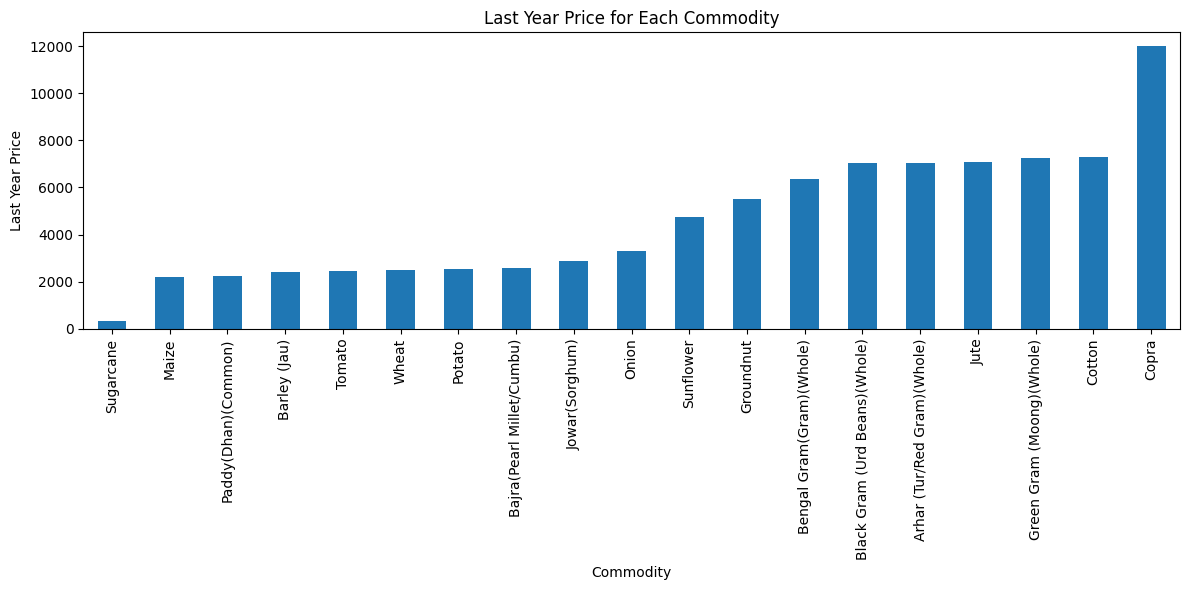

In [74]:
import matplotlib.pyplot as plt

# Group by Commodity and get the mean Last Year price (if there are duplicates)
commodity_last_year = df.groupby('Commodity')['Price'].mean().sort_values()

plt.figure(figsize=(12,6))
commodity_last_year.plot(kind='bar')
plt.ylabel('Last Year Price')
plt.title('Last Year Price for Each Commodity')
plt.tight_layout()
plt.show()

In [76]:
from sklearn.preprocessing import LabelEncoder
for col in ['Commodity', 'State', 'Market']:
    df[col] = LabelEncoder().fit_transform(df[col])

In [148]:
# So lets try to use Artificial Neural Networks (ANN) for this task
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

In [149]:
df_model = df[['Price', 'Last Week', 'Last Month', 'Last Year']].copy()
df_model['TargetPrice'] = df_model['Price'].shift(-1)
df_model.dropna(inplace=True)

In [150]:
df.head()

Commodity  State  Market   Price    Last Week   Last Month   Last Year  \
0          1      0     815  2379.0  2389.000000  3289.357187  2995.92835   
1          1      4    1195  2968.0  3482.049876  3289.357187  2995.92835   
2          1      6      51  2685.0  2650.000000  2650.000000  2995.92835   
3          1      6      56  2705.0  2661.961538  2840.000000  2995.92835   
4          1      6     179  2100.0  2300.000000  2603.984848  2995.92835   

  Today Arrivals Last Week.1 Last Month.1 Last Year.1  TargetPrice  
0           10.6         1.4            -           -       2968.0  
1           48.8           -            -           -       2685.0  
2            0.8         1.4          0.4           -       2705.0  
3            1.8           -          4.4           -       2100.0  
4            0.1         0.1            -           -       2650.0

In [151]:
X = df_model[['Price', 'Last Week', 'Last Month', 'Last Year']]
y = df_model['TargetPrice'].values

In [152]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [154]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor  = torch.tensor(X_test,  dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

In [155]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 1)   

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

model = ANN()

In [162]:
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.02)

In [163]:
epochs = 300
from torch.nn.utils import clip_grad_norm_ 

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # 💥 If loss is NaN, stop immediately
    if torch.isnan(loss):
        print(f"🚨 NaN detected in loss at Epoch {epoch}! Training stopped.")
        break

    loss.backward()
    clip_grad_norm_(model.parameters(), max_norm=1.0)

    optimizer.step()

    if (epoch+1) % 50 == 0 or epoch == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.2f}")

Epoch 1/300, Loss: 623.43
Epoch 50/300, Loss: 622.86
Epoch 100/300, Loss: 626.27
Epoch 150/300, Loss: 622.57
Epoch 200/300, Loss: 628.96
Epoch 250/300, Loss: 624.30
Epoch 300/300, Loss: 622.98


In [164]:
torch.save(model.state_dict(), "market_price_ann.pt")

In [165]:
import joblib
joblib.dump(scaler, "market_price_scaler.pkl")


['market_price_scaler.pkl']